# Slice and histogram

Slice and histogram can be useful in some studies such as river terrace identification, or asymmetrical development of landscape. Here, we introduce the methods to plot slice and histogram under curvilinear and circular conditions.

## Curvilinear case

### Histogram plot

We use the same synthetic landscape that being used in the section [Fixed-width curvilinear swath profile](./fix_width_curv.ipynb). 


In [1]:
import pyosp

baseline = pyosp.datasets.get_path("homo_baseline.shp") # the path to baseline shapefile
raster = pyosp.datasets.get_path("homo_mount.tif")  # the path to raster file

orig = pyosp.Orig_curv(baseline, raster, width=100,
                       line_stepsize=3, cross_stepsize=None)

Processing: [#########################] 71 of 71 lineSteps

We can plot histogram of all swath data.

<AxesSubplot:xlabel='Elevation', ylabel='PDF'>

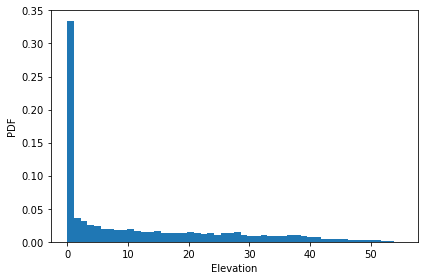

In [2]:
orig.hist()

We can make some changes to the plot by passing an ax object to the method.

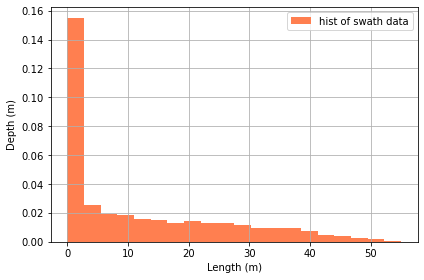

In [3]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
orig.hist(ax=ax, bins=20, color="coral", label="hist of swath data")
ax.set_xlabel("Length (m)")
ax.set_ylabel("Depth (m)")
ax.grid()
ax.legend()

### Slice plot

For plotting the cross-section, PyOSP provides two ways to determine the location of a slice. In the first method, user can pass a value indicating the slice distance from the starting point:

<AxesSubplot:xlabel='Distance to left end', ylabel='Elevation'>

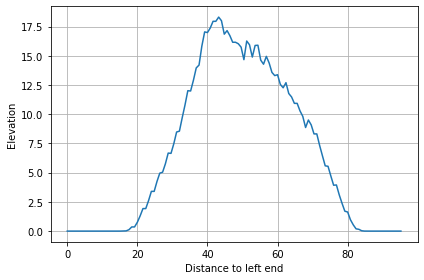

In [4]:
orig.slice_plot(loc=20)

However, it is inconvenient in some cases by using distance to locate a cross-section. PyOSP provides an alternative method. The user can draw points on the baseline to indicate the location of the desired slice, and pass these points information to PyOSP. As shown below, we have two points drew on the map, now we plot the corresponding slices.

<img alt="homo_case" src="https://i.imgur.com/9QUKGDT.png" height="250"/>


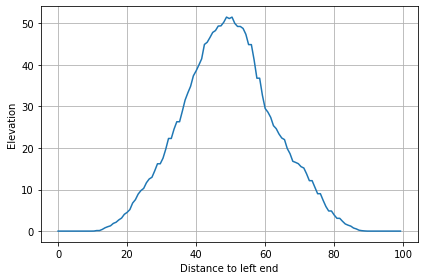

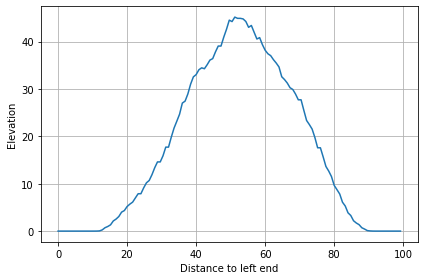

In [5]:
from pyosp import point_coords

pointsPath = pyosp.datasets.get_path("homo_start_end.shp") # the path to the points

pointsCoords = point_coords(pointsPath)

for point in pointsCoords:
    orig.slice_plot(loc=point)

### Histogram of slice

Further, we can plot histogram of slice data.

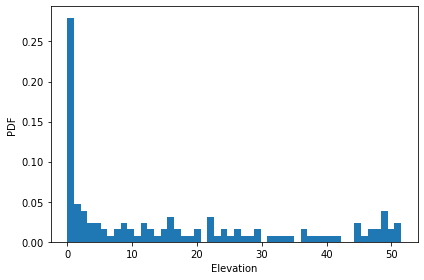

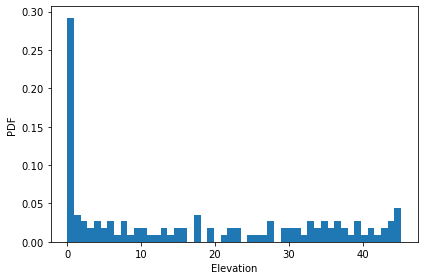

In [6]:
for point in pointsCoords:
    orig.slice_hist(loc=point)

## Circular case

### Histogram plot

We use the same synthetic landscape that being used in the section [Fixed-radius circular swath profile](./fix_radius_cir.ipynb). 



In [ ]:
# restart the kernel
import os
os._exit(00)

In [1]:
import pyosp

center = pyosp.datasets.get_path("center.shp")  # path to the central point shapefile
raster = pyosp.datasets.get_path("crater.tif")  # path to the raster tif

orig = pyosp.Orig_cir(center, raster, radius=80,
                      ng_start=0, ng_end=360,
                      ng_stepsize=5, radial_stepsize=None)

Processing: [#########################] 72 of 72 lineSteps

Plot the histogram for all swath data

<AxesSubplot:xlabel='Elevation', ylabel='PDF'>

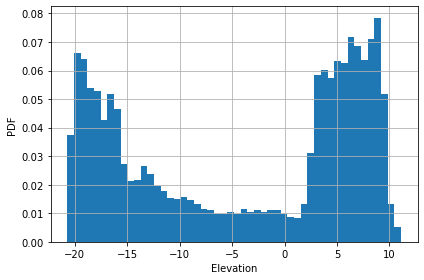

In [2]:
orig.hist()

### Slice plot

To plot a slice of circular profile, user needs to pass the *angle* that is referenced to the horizontal line.  


<AxesSubplot:xlabel='Distance to center', ylabel='Elevation'>

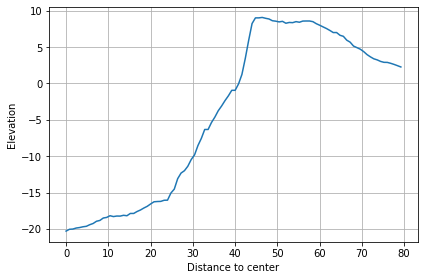

In [3]:
orig.slice_plot(angle=30)

### Slice histogram

PyOSP also provides histogram of slice in circular condition.

<AxesSubplot:xlabel='Elevation', ylabel='PDF'>

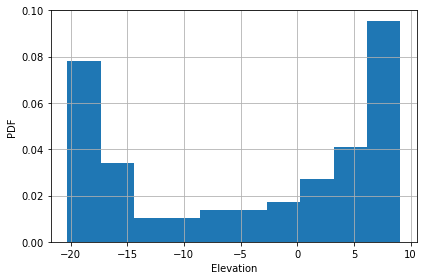

In [4]:
orig.slice_hist(angle=30, bins=10)

## Summary

In this section, we introduced the methods to plot the histogram and slice for curvilinear and circular swath cases. The combination of these methods with object-oriented swath analysis can provide useful insights in terms of cross-section and data distribution of the studying object.  